<a href="https://colab.research.google.com/github/ustab/tensorf-ml/blob/main/BMWPRICE_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [4]:
dataFrame = pd.read_csv("/content/bmw.csv")

In [304]:
dataFrame.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [5]:
dataFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
year,10781.0,2017.078935,2.349038,1996.0,2016.0,2017.0,2019.0,2020.0
price,10781.0,22733.408867,11415.528189,1200.0,14950.0,20462.0,27940.0,123456.0
mileage,10781.0,25496.986550,25143.192559,1.0,5529.0,18347.0,38206.0,214000.0
tax,10781.0,131.702068,61.510755,0.0,135.0,145.0,145.0,580.0
mpg,10781.0,56.399035,31.336958,5.5,45.6,53.3,62.8,470.8
engineSize,10781.0,2.167767,0.552054,0.0,2.0,2.0,2.0,6.6


In [6]:
dataFrame.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


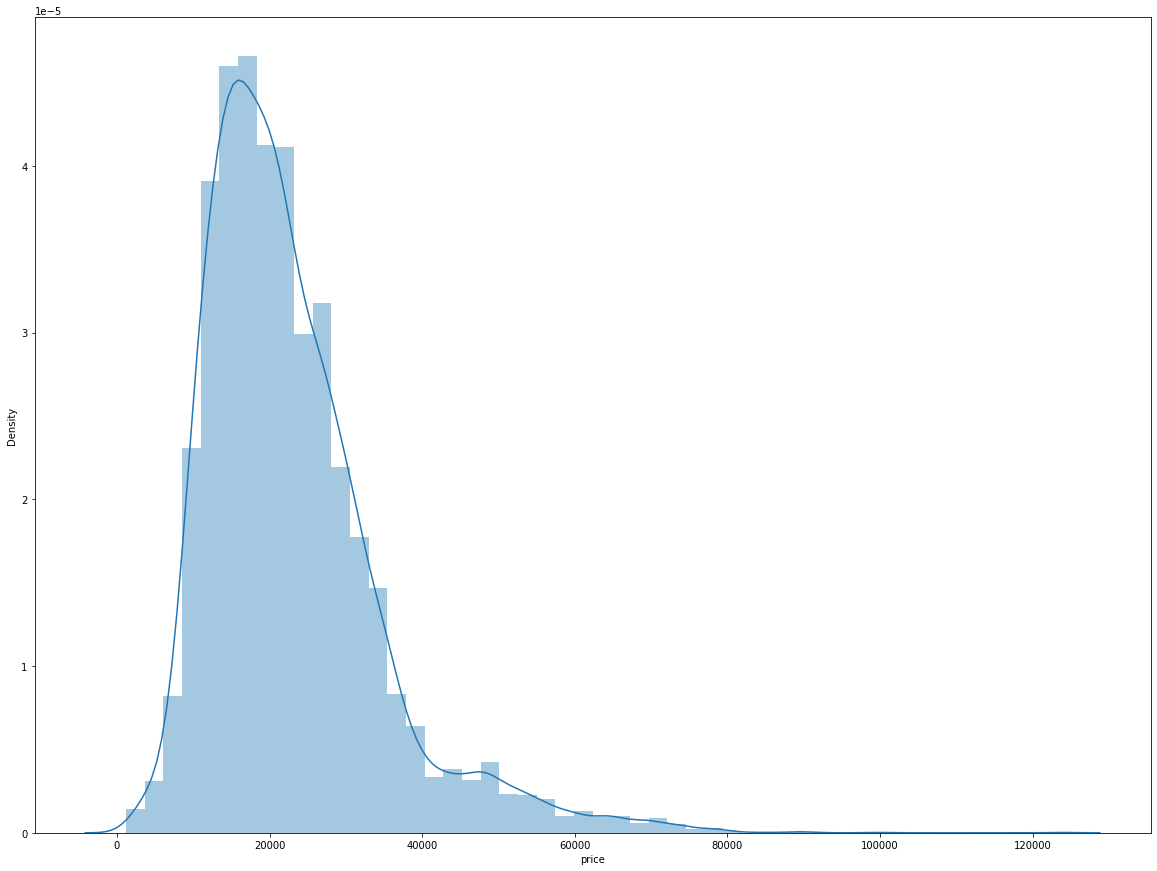

In [7]:
plt.figure(figsize=(20,15))
sbn.distplot(dataFrame["price"]);#distribusyon grafigi cizdirelim, saga dogru skreww var

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


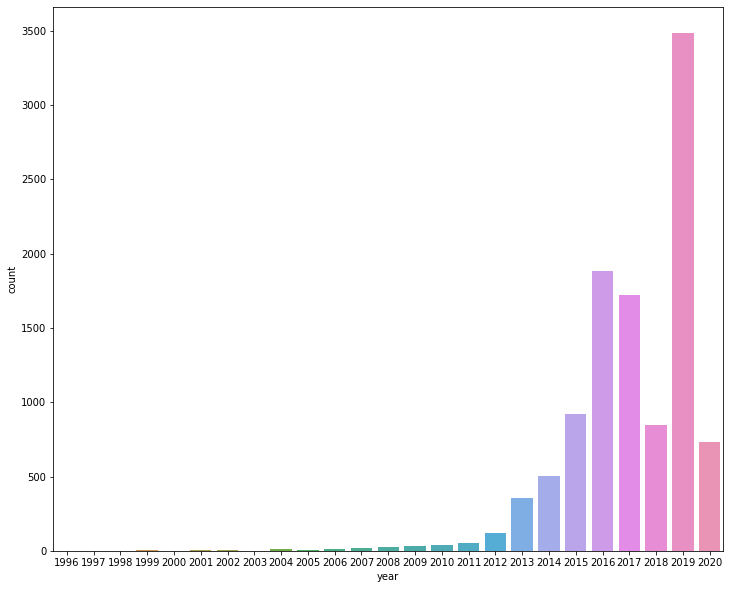

In [8]:
plt.figure(figsize=(12,10))
sbn.countplot(dataFrame["year"]);#hangi yil kac araba var

In [9]:
dataFrame.corr()#birbirleri arasinda iliski varmi

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.623756,-0.774382,0.025200,-0.071762,-0.026337
price,0.623756,1.000000,-0.605397,0.263484,-0.204882,0.460196
mileage,-0.774382,-0.605397,1.000000,-0.170747,0.118609,-0.002540
tax,0.025200,0.263484,-0.170747,1.000000,-0.351798,0.429616
mpg,-0.071762,-0.204882,0.118609,-0.351798,1.000000,-0.399844
engineSize,-0.026337,0.460196,-0.002540,0.429616,-0.399844,1.000000


In [10]:
dataFrame.corr()["price"].sort_values()# sadece fiyatlara gore siralayalim

mileage      -0.605397
mpg          -0.204882
tax           0.263484
engineSize    0.460196
year          0.623756
price         1.000000
Name: price, dtype: float64

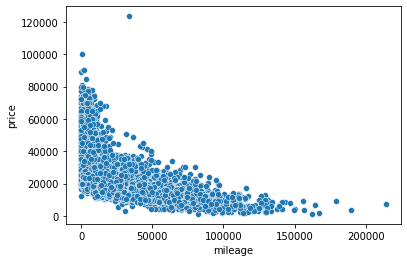

In [11]:
sbn.scatterplot(x="mileage",y="price",data=dataFrame)#mil e gore fiyat arasinda nasil bir iliski var

In [12]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [13]:
dataFrame.sort_values("price",ascending = False).head(20) #cokdan aza dogru fiyatlari siralayalim

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
3638,2 Series,2015,123456,Semi-Auto,33419,Diesel,20,68.9,2.0
5362,M4,2016,99950,Automatic,771,Petrol,300,33.2,3.0
2909,M4,2017,89990,Semi-Auto,1336,Petrol,145,33.2,3.0
4776,M5,2019,89900,Semi-Auto,2269,Petrol,145,24.1,4.4
1813,8 Series,2019,88980,Semi-Auto,88,Petrol,145,24.4,4.4
721,8 Series,2019,84898,Semi-Auto,3185,Petrol,145,24.4,4.4
5877,M5,2019,81140,Semi-Auto,551,Petrol,145,24.1,4.4
6115,8 Series,2020,79991,Semi-Auto,151,Diesel,145,26.7,3.0
7024,X7,2020,79566,Semi-Auto,1000,Petrol,145,24.8,3.0
2602,X7,2020,78490,Semi-Auto,4919,Diesel,145,31.4,3.0


In [16]:
dataFrame.sort_values("price",ascending = True).head() #cokdan aza dogru fiyatlari siralayalim

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
9744,3 Series,1999,1200,Automatic,82000,Petrol,245,31.0,2.8
9696,3 Series,2004,1445,Manual,162000,Diesel,205,49.6,2.0
9554,1 Series,2007,1500,Manual,167000,Diesel,125,57.6,2.0
10006,3 Series,2000,1550,Automatic,93000,Petrol,270,29.7,2.5
7284,5 Series,2002,1595,Automatic,115000,Petrol,325,28.5,2.2


In [17]:
dataFrame.shape

(10781, 9)

In [18]:
len(dataFrame)#tane araba fiyati var

10781

In [20]:
len(dataFrame)*0.05 #tane araba fiyati var

539.0500000000001

In [21]:
yuzdeDoksanbesDf = dataFrame.sort_values("price",ascending = False).iloc[533:]# en yuksek 131 adet fiyatli araba var, bunlar % 1 olup verimi bozmaz. burada desc siralama var ve de en yuksek olan veriden aza dogru 131 tanesini cikardik

In [22]:
yuzdeDoksanbesDf.describe().T

,count,mean,std,min,25%,50%,75%,max
year,10248.0,2016.973751,2.358185,1996.0,2016.0,2017.0,2019.0,2020.0
price,10248.0,20975.088700,8366.145107,1200.0,14500.0,19914.0,26500.0,46000.0
mileage,10248.0,26574.361144,25309.810339,1.0,6035.0,20189.0,39758.0,214000.0
tax,10248.0,131.007514,62.909222,0.0,125.0,145.0,145.0,580.0
mpg,10248.0,57.343618,31.430724,5.5,47.9,53.3,62.8,470.8
engineSize,10248.0,2.122112,0.515361,0.0,2.0,2.0,2.0,5.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


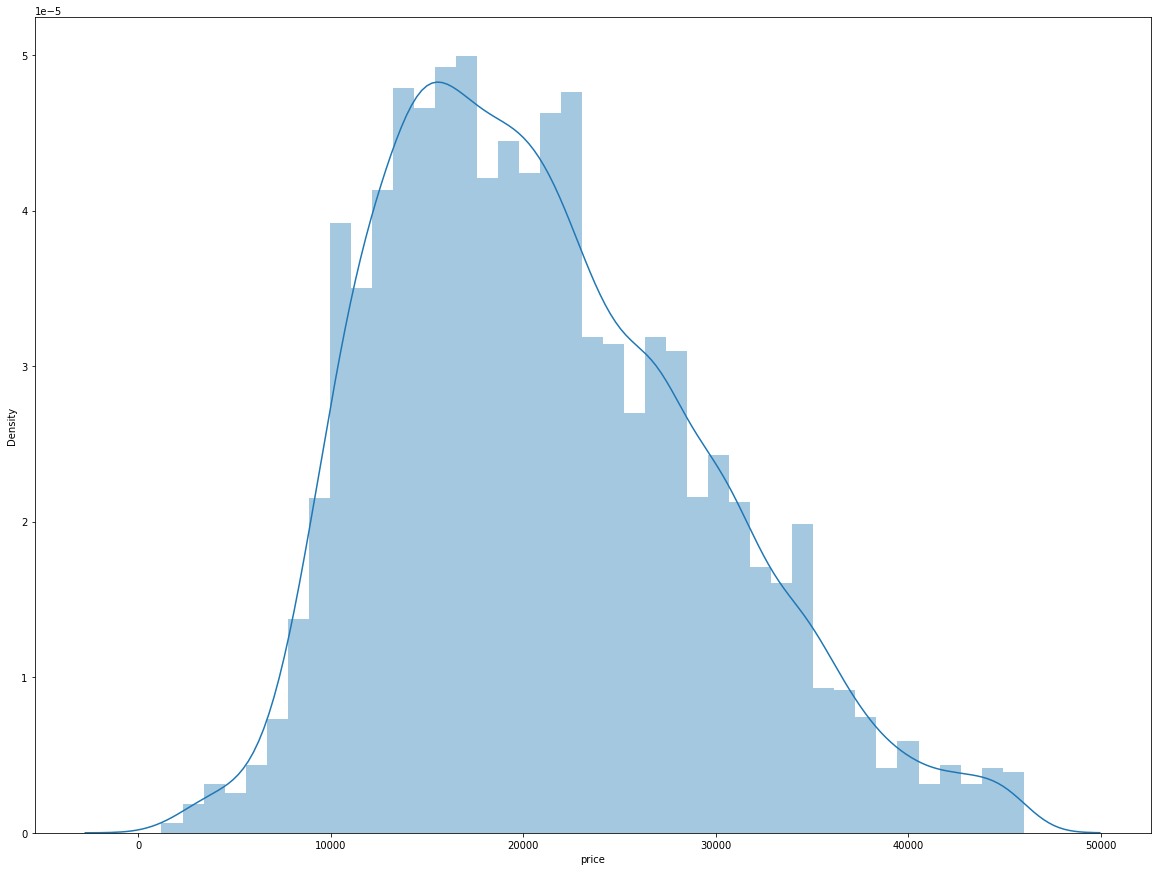

In [23]:
plt.figure(figsize=(20,15))
sbn.distplot(yuzdeDoksanbesDf['price'])

In [24]:
dataFrame.groupby("year").mean()["price"]

year
1996     5995.000000
1997     3950.000000
1998     3950.000000
1999     3285.000000
2000     1624.500000
2001     7333.333333
2002     5486.500000
2003     9222.500000
2004     8213.166667
2005     5390.166667
2006     5252.714286
2007     4830.500000
2008     6240.043478
2009     6618.100000
2010     7490.390244
2011     9099.098039
2012     9533.689076
2013    11118.355742
2014    13323.598802
2015    15199.753796
2016    16638.403826
2017    19267.174898
2018    22721.656840
2019    31025.864275
2020    35377.680764
Name: price, dtype: float64

In [26]:
yuzdeDoksanbesDf[dataFrame.year > 2012].groupby("year").mean()["price"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


year
2013    11118.355742
2014    13323.598802
2015    15082.211726
2016    16544.724854
2017    19004.147455
2018    22121.819928
2019    27847.135319
2020    31533.663477
Name: price, dtype: float64

In [27]:
yuzdeDoksanbesDf.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
3122,M4,2019,46000,Semi-Auto,1501,Petrol,145,32.5,3.0
5086,M4,2019,45999,Semi-Auto,2373,Petrol,145,34.0,3.0
5897,M4,2019,45999,Automatic,99,Petrol,145,34.0,3.0
530,X5,2019,45995,Semi-Auto,16644,Diesel,150,37.7,3.0
6530,M4,2020,45995,Semi-Auto,1500,Petrol,145,34.0,3.0


In [28]:
yuzdeDoksanbesDf.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.703590,-0.766832,0.015502,-0.045960,-0.108256
price,0.703590,1.000000,-0.682022,0.322332,-0.168449,0.322200
mileage,-0.766832,-0.682022,1.000000,-0.164272,0.097073,0.072743
tax,0.015502,0.322332,-0.164272,1.000000,-0.350994,0.450427
mpg,-0.045960,-0.168449,0.097073,-0.350994,1.000000,-0.379424
engineSize,-0.108256,0.322200,0.072743,0.450427,-0.379424,1.000000


In [29]:
yuzdeDoksanbesDf.describe(include='all')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,10248,10248.000000,10248.000000,10248,10248.000000,10248,10248.000000,10248.000000,10248.000000
unique,22,NaN,NaN,3,NaN,5,NaN,NaN,NaN
top,3 Series,NaN,NaN,Semi-Auto,NaN,Diesel,NaN,NaN,NaN
freq,2439,NaN,NaN,4299,NaN,6698,NaN,NaN,NaN
mean,NaN,2016.973751,20975.088700,NaN,26574.361144,NaN,131.007514,57.343618,2.122112
std,NaN,2.358185,8366.145107,NaN,25309.810339,NaN,62.909222,31.430724,0.515361
min,NaN,1996.000000,1200.000000,NaN,1.000000,NaN,0.000000,5.500000,0.000000
25%,NaN,2016.000000,14500.000000,NaN,6035.000000,NaN,125.000000,47.900000,2.000000
50%,NaN,2017.000000,19914.000000,NaN,20189.000000,NaN,145.000000,53.300000,2.000000
75%,NaN,2019.000000,26500.000000,NaN,39758.000000,NaN,145.000000,62.800000,2.000000


In [30]:
yuzdeDoksanbesDf= dataFrame.drop(['model','transmission', 'fuelType'],axis=1)

In [31]:
yuzdeDoksanbesDf.head(2)

,year,price,mileage,tax,mpg,engineSize
0,2014,11200,67068,125,57.6,2.0
1,2018,27000,14827,145,42.8,2.0


In [33]:
y = yuzdeDoksanbesDf["price"].values

In [34]:
x = yuzdeDoksanbesDf.drop("price",axis=1).values

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [37]:
len(x_train)

8085

In [38]:
x_train

array([[2.0190e+03, 1.0100e+02, 1.4500e+02, 5.8900e+01, 2.0000e+00],
       [2.0170e+03, 3.6642e+04, 1.5000e+02, 6.8900e+01, 2.0000e+00],
       [2.0150e+03, 4.8746e+04, 2.0000e+01, 7.2400e+01, 1.5000e+00],
       ...,
       [2.0190e+03, 1.2300e+02, 1.4500e+02, 6.0100e+01, 2.0000e+00],
       [2.0110e+03, 6.9561e+04, 1.6000e+02, 4.9600e+01, 2.0000e+00],
       [2.0170e+03, 1.5867e+04, 1.4500e+02, 6.1400e+01, 2.0000e+00]])

In [39]:
len(x_test)

2696

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [59]:
x_train = scaler.fit_transform(x_train)

In [ ]:
x_test = scaler.transform(x_test)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
x_train.shape

In [70]:
model = Sequential()

model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [71]:
md=model.fit(x=x_train, y = y_train,validation_data=(x_test,y_test),batch_size=2000,epochs=600)

Epoch 1/600
5/5 [==============================] - 1s 54ms/step - loss: 649518144.0000 - val_loss: 639886784.0000
Epoch 2/600
5/5 [==============================] - 0s 13ms/step - loss: 649517248.0000 - val_loss: 639885696.0000
Epoch 3/600
5/5 [==============================] - 0s 13ms/step - loss: 649516032.0000 - val_loss: 639884224.0000
Epoch 4/600
5/5 [==============================] - 0s 13ms/step - loss: 649514560.0000 - val_loss: 639882624.0000
Epoch 5/600
5/5 [==============================] - 0s 13ms/step - loss: 649512768.0000 - val_loss: 639880640.0000
Epoch 6/600
5/5 [==============================] - 0s 14ms/step - loss: 649510592.0000 - val_loss: 639878144.0000
Epoch 7/600
5/5 [==============================] - 0s 14ms/step - loss: 649508032.0000 - val_loss: 639875200.0000
Epoch 8/600
5/5 [==============================] - 0s 14ms/step - loss: 649504896.0000 - val_loss: 639871680.0000
Epoch 9/600
5/5 [==============================] - 0s 13ms/step - loss: 649501056.0000 -

In [72]:
val_loss = pd.DataFrame(model.history.history)

In [73]:
val_loss.head()

,loss,val_loss
0,649518144.0,639886784.0
1,649517248.0,639885696.0
2,649516032.0,639884224.0
3,649514560.0,639882624.0
4,649512768.0,639880640.0


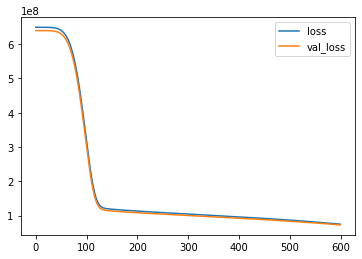

In [74]:
val_loss.plot()

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [76]:
prediction = model.predict(x_test)

In [77]:
prediction

array([[29669.426],
       [22379.314],
       [21073.691],
       ...,
       [24406.865],
       [ 9138.255],
       [28733.963]], dtype=float32)

In [86]:
mean_squared_error(y_test,prediction)

72589378.80468668

In [78]:
mean_absolute_error(y_test,prediction)

6070.232208704736

In [79]:
yuzdeDoksanbesDf.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


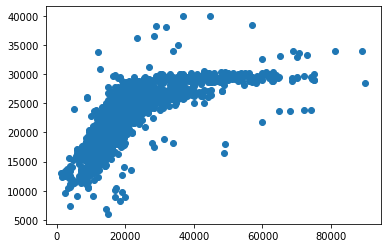

In [80]:
plt.scatter(y_test,prediction)

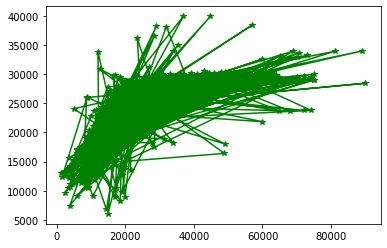

In [87]:
plt.plot(y_test,prediction,"g-*")

In [85]:
yuzdeDoksanbesDf.shape

(10781, 6)

In [88]:
yuzdeDoksanbesDf.iloc[2]

year           2016.0
price         16000.0
mileage       62794.0
tax             160.0
mpg              51.4
engineSize        3.0
Name: 2, dtype: float64

ORNEK UYGULAMA

In [95]:
yuzdeDoksanbesDf.head()

,year,price,mileage,tax,mpg,engineSize
0,2014,11200,67068,125,57.6,2.0
1,2018,27000,14827,145,42.8,2.0
2,2016,16000,62794,160,51.4,3.0
3,2017,12750,26676,145,72.4,1.5
4,2014,14500,39554,160,50.4,3.0


In [100]:
yeniArabaSeries = yuzdeDoksanbesDf.drop("price",axis=1).iloc[2]

In [101]:
type(yeniArabaSeries)

pandas.core.series.Series

In [102]:
yeniArabaSeries = scaler.fit_transform(yeniArabaSeries.values.reshape(-1,5))

In [103]:
model.predict(yeniArabaSeries)

array([[4344.26]], dtype=float32)